## Linear regression using machine learning

We're going to train a single neuron to perform linear regression on given data points.

In [1]:
# Importing libraries
import torch
import numpy as np
import matplotlib.pyplot as plt

# Importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Setting plot style
plt.style.use('petroff10')

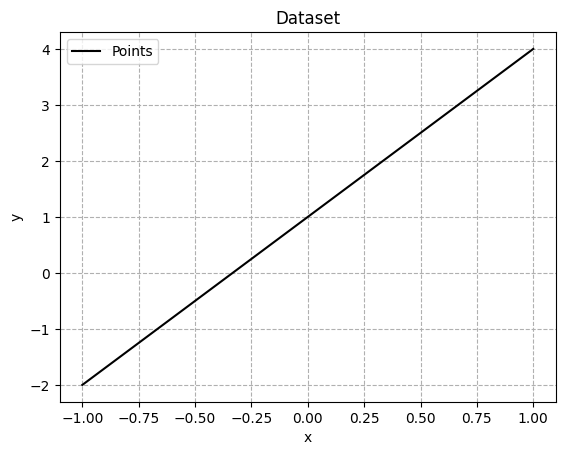

In [2]:
# Generating a dataset
x = np.linspace(- 1, 1, 200)
y = 3 * x + 1 # y = 3x + 1

plt.plot(x, y, label = 'Points', color = 'black')
plt.title('Dataset')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(linestyle = '--')
plt.legend()
plt.show()

### Conversion of the dataset

PyTorch neural networks require data to be in tensor format. Then, we will convert the dataset into two tensors:

- x: input features (dimension [n_samples, n_features])
- y: target labels (dimension [n_samples, 1])

For our linear regression task, both tensors will have a fixed dimension of [200, 1] (200 data points, 1 feature/label).

In [3]:
# Converting x data to a Pytorch tensor
x = torch.from_numpy(x)
x, x.size(), x.dim(), x.dtype # Size, dimensions and datatype of x

(tensor([-1.0000, -0.9899, -0.9799, -0.9698, -0.9598, -0.9497, -0.9397, -0.9296,
         -0.9196, -0.9095, -0.8995, -0.8894, -0.8794, -0.8693, -0.8593, -0.8492,
         -0.8392, -0.8291, -0.8191, -0.8090, -0.7990, -0.7889, -0.7789, -0.7688,
         -0.7588, -0.7487, -0.7387, -0.7286, -0.7186, -0.7085, -0.6985, -0.6884,
         -0.6784, -0.6683, -0.6583, -0.6482, -0.6382, -0.6281, -0.6181, -0.6080,
         -0.5980, -0.5879, -0.5779, -0.5678, -0.5578, -0.5477, -0.5377, -0.5276,
         -0.5176, -0.5075, -0.4975, -0.4874, -0.4774, -0.4673, -0.4573, -0.4472,
         -0.4372, -0.4271, -0.4171, -0.4070, -0.3970, -0.3869, -0.3769, -0.3668,
         -0.3568, -0.3467, -0.3367, -0.3266, -0.3166, -0.3065, -0.2965, -0.2864,
         -0.2764, -0.2663, -0.2563, -0.2462, -0.2362, -0.2261, -0.2161, -0.2060,
         -0.1960, -0.1859, -0.1759, -0.1658, -0.1558, -0.1457, -0.1357, -0.1256,
         -0.1156, -0.1055, -0.0955, -0.0854, -0.0754, -0.0653, -0.0553, -0.0452,
         -0.0352, -0.0251, -

The input data is currently in *torch.float64* (double-precision) format. We should cast it to *torch.float32* (single-precision), as this is PyTorch's standard data type for neural networks. Moreover, we must reshape it to get a tensor of dimensions [200, 1].

In [4]:
# Converting x from float64 to float32
x = x.float()

# Reshaping x adding a new dimension
x = x.unsqueeze(1)
x

tensor([[-1.0000],
        [-0.9899],
        [-0.9799],
        [-0.9698],
        [-0.9598],
        [-0.9497],
        [-0.9397],
        [-0.9296],
        [-0.9196],
        [-0.9095],
        [-0.8995],
        [-0.8894],
        [-0.8794],
        [-0.8693],
        [-0.8593],
        [-0.8492],
        [-0.8392],
        [-0.8291],
        [-0.8191],
        [-0.8090],
        [-0.7990],
        [-0.7889],
        [-0.7789],
        [-0.7688],
        [-0.7588],
        [-0.7487],
        [-0.7387],
        [-0.7286],
        [-0.7186],
        [-0.7085],
        [-0.6985],
        [-0.6884],
        [-0.6784],
        [-0.6683],
        [-0.6583],
        [-0.6482],
        [-0.6382],
        [-0.6281],
        [-0.6181],
        [-0.6080],
        [-0.5980],
        [-0.5879],
        [-0.5779],
        [-0.5678],
        [-0.5578],
        [-0.5477],
        [-0.5377],
        [-0.5276],
        [-0.5176],
        [-0.5075],
        [-0.4975],
        [-0.4874],
        [-0.

In [5]:
# New size, dimensions and datatype of x
x.size(), x.dim(), x.dtype

(torch.Size([200, 1]), 2, torch.float32)

In [6]:
# Working on y as did before for x
y = torch.from_numpy(y).float().unsqueeze(1)
y.size(), y.dim(), y.dtype

(torch.Size([200, 1]), 2, torch.float32)

### Splitting the dataset

To properly evaluate our model's performance we're going to randomly split the dataset into:

- Training set (80% of data)
- Test set (20% of data)

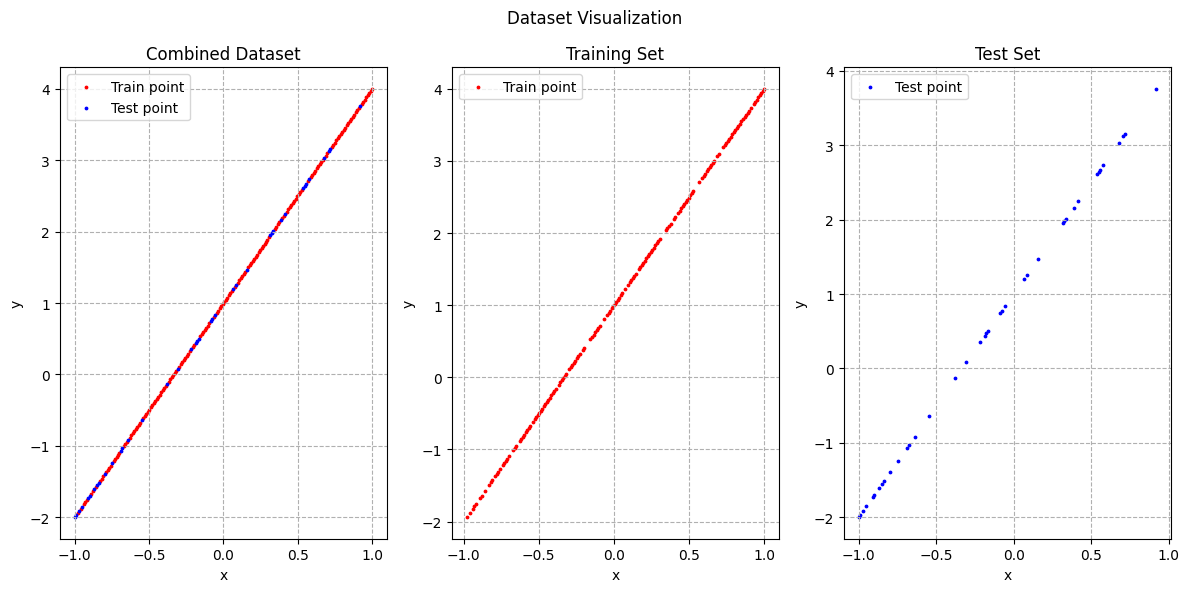

In [7]:
# Splitting data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 47)

# Create figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize = (12, 6))
fig.suptitle('Dataset Visualization')

# Combined train and test points
axes[0].scatter(x_train.numpy(), y_train.numpy(), label = 'Train point', color = 'red', s = 3)
axes[0].scatter(x_test.numpy(), y_test.numpy(), label = 'Test point', color = 'blue', s = 3)
axes[0].set_title('Combined Dataset')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].grid(linestyle = '--')
axes[0].legend()

# Train points
axes[1].scatter(x_train.numpy(), y_train.numpy(), label = 'Train point', color = 'red', s = 3)
axes[1].set_title('Training Set')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].grid(linestyle = '--')
axes[1].legend()

# Test points
axes[2].scatter(x_test.numpy(), y_test.numpy(), label = 'Test point', color = 'blue', s = 3)
axes[2].set_title('Test Set')
axes[2].set_xlabel('x')
axes[2].set_ylabel('y')
axes[2].grid(linestyle = '--')
axes[2].legend()

plt.tight_layout()
plt.show()

### Building the network

Now that the dataset is prepared, we're going to construct the neural network. For a simple linear regression a single neuron (no hidden layers) suffices, as it mathematically reduces to linear regression.

In [8]:
# Defining a single neuron
neuron = torch.nn.Linear(in_features = 1, out_features = 1)
neuron

Linear(in_features=1, out_features=1, bias=True)

In [9]:
# Initial weight and bias are casual
list(neuron.parameters()) # 1: weight, 2: bias

[Parameter containing:
 tensor([[0.5544]], requires_grad=True),
 Parameter containing:
 tensor([0.8586], requires_grad=True)]

In [10]:
# Defining the loss function
loss_function = torch.nn.MSELoss() # Mean Squared Error 
loss_function

MSELoss()

In [11]:
# Defining the optimization algorithm
optimizer = torch.optim.SGD(params = neuron.parameters()) # Stochastic Gradient Descent
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

### Training

With the neuron, loss function and optimizer defined, we now train the model using the prepared training data (x_train, y_train).

In [12]:
# Training the model
max_epochs = 10_000 # Max number of iterations

losses_list_train = []
losses_list_test = []
weight_list = []
bias_list = []

weight = neuron.weight.data.item()
bias = neuron.bias.data.item()

# Early stopping parameters
min_loss_train = 0.0001 # Minimum improvement to count as progress
patience = 100 # Epochs to wait without improvement
best_loss_train = float('inf')
no_improve_count = 0

neuron.train() # Setting the neuron into training mode
for epoch in range(max_epochs):

    prediction_train = neuron(x_train) # Making predictions with x_train
    prediction_test = neuron(x_test) # Making predictions with x_test

    loss_train = loss_function(prediction_train, y_train) # Computing the loss_train
    loss_test = loss_function(prediction_test, y_test) # Computing the loss_test
    
    optimizer.zero_grad() # clear previous gradients
    loss_train.backward() # automatic differentation
    optimizer.step() # update parameters
    
    # Storing values
    loss_train = loss_train.item()
    losses_list_train.append(loss_train)

    loss_test = loss_test.item()
    losses_list_test.append(loss_test)

    weight = neuron.weight.data.item()
    weight_list.append(weight)

    bias = neuron.bias.data.item()   
    bias_list.append(bias)

    # Printing progress
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss train: {loss_train:.4f}, Loss test: {loss_test:.4f}, Weight: {weight:.4f}, Bias: {bias:.4f}')
    
    # Checking if loss improved significantly
    if best_loss_train - loss_train > min_loss_train:
        best_loss_train = loss_train
        no_improve_count = 0
    else:
        no_improve_count += 1
    
    # Checking stopping condition
    if no_improve_count > patience:
        print(f'\nStopping early at epoch {epoch}: No improvement for {patience} epochs')
        print(f'Final loss train: {loss_train:.4f}, Final loss test: {loss_test:.4f}, Final weight: {weight:.4f}, Final bias: {bias:.4f}')
        break
    
    # If maximum iteration limit is reached
    if epoch == max_epochs:
        print(f'Final loss train: {loss_train:.4f}, Final loss test: {loss_test:.4f}, Final weight: {weight:.4f}, Final bias: {bias:.4f}')

neuron.eval() # Exit from training mode

Epoch 0, Loss train: 2.0011, Loss test: 2.1637, Weight: 0.5561, Bias: 0.8590
Epoch 100, Loss train: 1.7400, Loss test: 1.9157, Weight: 0.7115, Bias: 0.9025
Epoch 200, Loss train: 1.5166, Loss test: 1.6961, Weight: 0.8568, Bias: 0.9370
Epoch 300, Loss train: 1.3243, Loss test: 1.5012, Weight: 0.9927, Bias: 0.9641
Epoch 400, Loss train: 1.1580, Loss test: 1.3281, Weight: 1.1198, Bias: 0.9854
Epoch 500, Loss train: 1.0137, Loss test: 1.1744, Weight: 1.2387, Bias: 1.0018
Epoch 600, Loss train: 0.8881, Loss test: 1.0379, Weight: 1.3500, Bias: 1.0144
Epoch 700, Loss train: 0.7785, Loss test: 0.9168, Weight: 1.4541, Bias: 1.0239
Epoch 800, Loss train: 0.6828, Loss test: 0.8094, Weight: 1.5516, Bias: 1.0309
Epoch 900, Loss train: 0.5991, Loss test: 0.7142, Weight: 1.6429, Bias: 1.0359
Epoch 1000, Loss train: 0.5258, Loss test: 0.6299, Weight: 1.7284, Bias: 1.0393
Epoch 1100, Loss train: 0.4616, Loss test: 0.5553, Weight: 1.8085, Bias: 1.0415
Epoch 1200, Loss train: 0.4053, Loss test: 0.4893, W

Linear(in_features=1, out_features=1, bias=True)

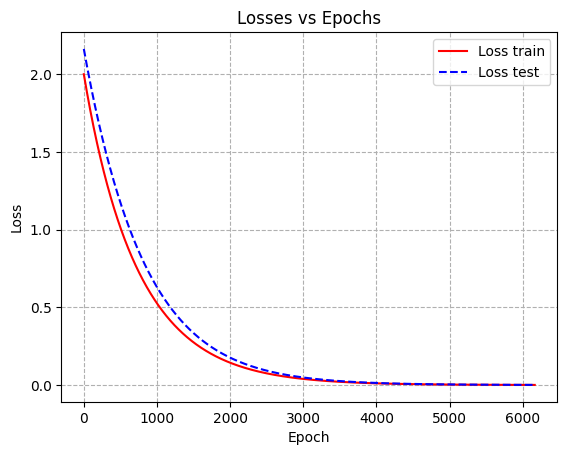

In [13]:
# Plotting the loss descending
plt.plot(losses_list_train, label = 'Loss train', color = 'red')
plt.plot(losses_list_test, label = 'Loss test', color = 'blue', linestyle = '--')
plt.title('Losses vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(linestyle = '--')
plt.legend()
plt.show()

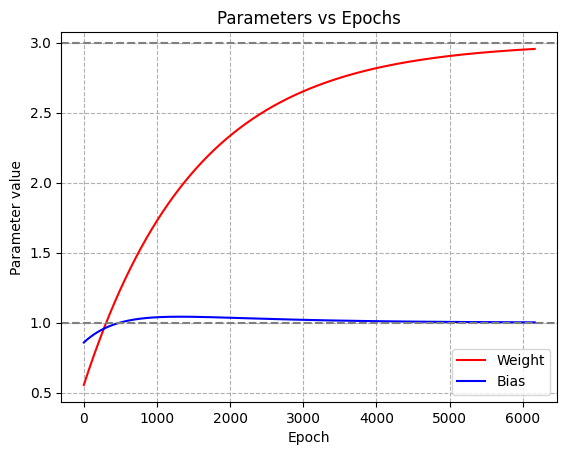

In [14]:
# Plotting the parameters convergence
plt.plot(weight_list, label = 'Weight', color = 'red')
plt.plot(bias_list, label = 'Bias', color = 'blue')
plt.axhline(y = 3, color = 'grey', linestyle = '--', label = '')
plt.axhline(y = 1, color = 'grey', linestyle = '--', label = '')
plt.title('Parameters vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Parameter value')
plt.grid(linestyle = '--')
plt.legend()
plt.show()

### Results

Now that training is complete, we'll assess the model's performance on unseen test data (x_test, y_test) to evaluate its generalization capability.

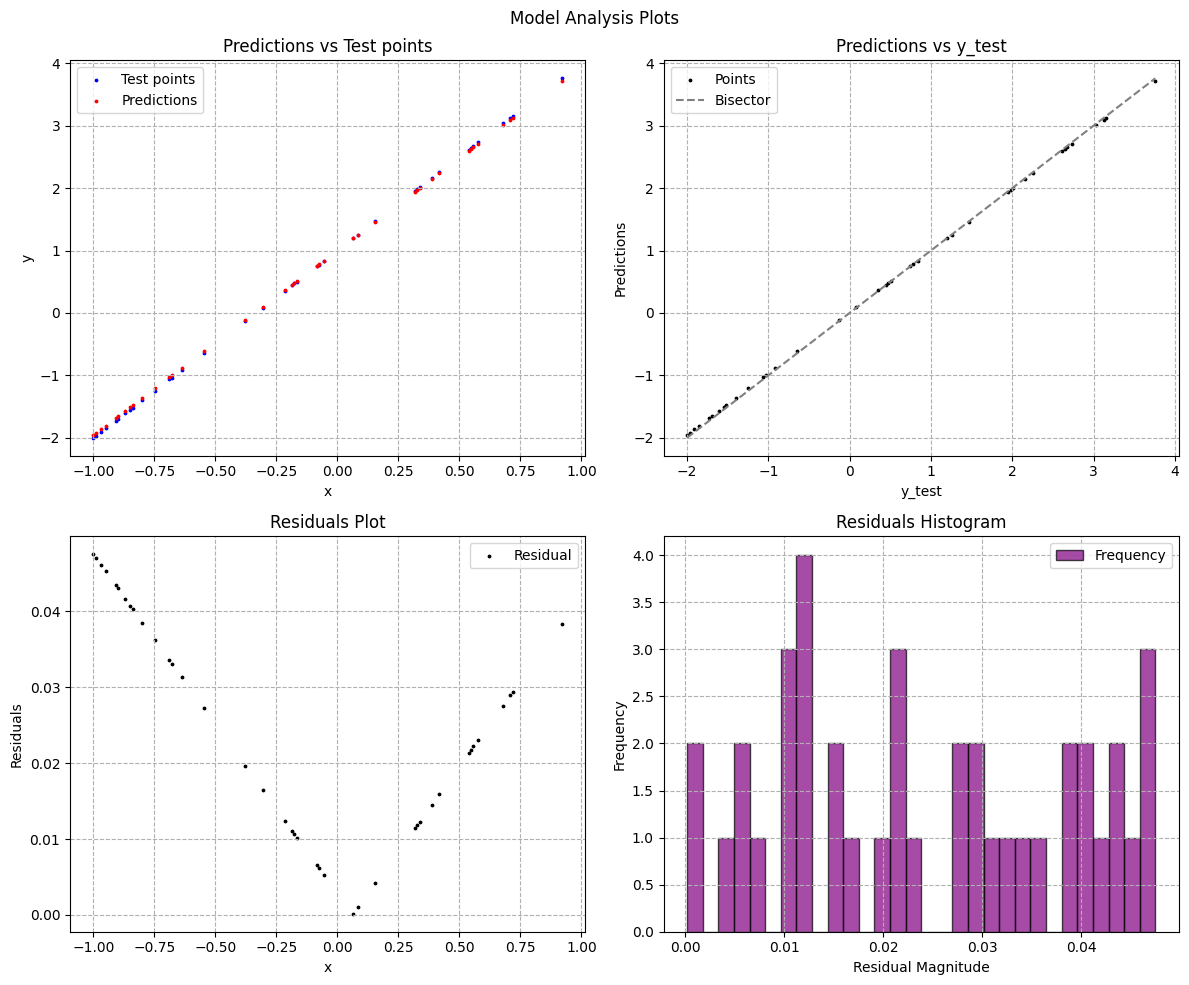

In [15]:
# Making predictions for x_test values
with torch.no_grad():
    predictions = neuron(x_test)

# Plotting predictions
x_test = x_test.numpy().reshape(-1)
y_test = y_test.numpy().reshape(-1)
predictions = predictions.numpy().reshape(-1)

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize = (12, 10))
fig.suptitle('Model Analysis Plots')

# Plot 1: Predictions vs Test points
axes[0, 0].scatter(x_test, y_test, label = 'Test points', color = 'blue', s = 3)
axes[0, 0].scatter(x_test, predictions, label = 'Predictions', color = 'red', s = 3)
axes[0, 0].set_title('Predictions vs Test points')
axes[0, 0].set_xlabel('x')
axes[0, 0].set_ylabel('y')
axes[0, 0].grid(linestyle = '--')
axes[0, 0].legend()

# Plot 2: Predictions vs y_test
x = np.linspace(np.min(y_test), np.max(y_test), 200)

axes[0, 1].scatter(y_test, predictions, label = 'Points', color = 'black', s = 3)
axes[0, 1].plot(x, x, label = 'Bisector', color = 'gray', linestyle = '--')
axes[0, 1].set_title('Predictions vs y_test')
axes[0, 1].set_xlabel('y_test')
axes[0, 1].set_ylabel('Predictions')
axes[0, 1].grid(linestyle = '--')
axes[0, 1].legend()

# Plot 3: Residuals
residuals = np.abs(y_test - predictions)

axes[1, 0].scatter(x_test, residuals, label = 'Residual', color = 'black', s = 3)
axes[1, 0].set_title('Residuals Plot')
axes[1, 0].set_xlabel('x')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].grid(linestyle = '--')
axes[1, 0].legend()

# Plot 4: Histogram of residuals
axes[1, 1].hist(residuals, bins = 30, label = 'Frequency', color = 'purple', edgecolor = 'black', alpha = 0.7)
axes[1, 1].set_title('Residuals Histogram')
axes[1, 1].set_xlabel('Residual Magnitude')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].grid(linestyle = '--')
axes[1, 1].legend()

plt.tight_layout()
plt.show()